In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

In [2]:
# 그리드서치로 최적의 파라미터 찾기

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
Cs = [0.001, 0.01, 0.1, 1, 10, 100]

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

best_score = 0

for gamma in gammas : 
    for C in Cs :
        svc = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        if best_score < score :
            best_score = score
            best_parameter = gamma,C
            
print("best score : ", best_score)
print("best parameter : ", best_parameter)

best score :  0.9736842105263158
best parameter :  (0.001, 100)


### 위 방법은 테스트 셋에서 가장 알맞는 매개변수를 찾는 것이다.
### 따라서 현재 테스트 셋에 과대적합되어 다른 데이터에는 일반화되지 못할 수 있다.
### 이를 해결하기 위해 테스트 셋과 무관한 검증 셋을 하나 더 만들어 검증 셋에서 최적의 매개변수를 찾는다.

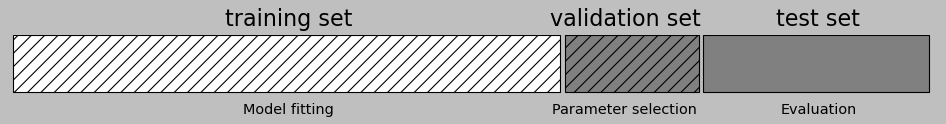

In [3]:
mglearn.plots.plot_threefold_split()

In [4]:
X_trainVal, X_test, y_trainVal, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainVal, y_trainVal)

best_score = 0

for gamma in gammas : 
    for C in Cs :
        svc = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svc.score(X_valid, y_valid)
        if best_score < score :
            best_score = score
            best_parameter = {'gamma' : gamma, 'C' : C}
            
svc_best = SVC(**best_parameter).fit(X_trainVal, y_trainVal)
            
print(f"best score in valid : {best_score:0.3f}")
print("best parameter in valid : ", best_parameter)

print(f"test score : {svc_best.score(X_test, y_test):0.3f}")

best score in valid : 0.964
best parameter in valid :  {'gamma': 0.01, 'C': 100}
test score : 0.974


### 교차 검증을 사용한 그리드 서치

In [5]:
from sklearn.model_selection import cross_val_score

best_score = 0
for gamma in gammas :
    for C in Cs :
        svc = SVC(gamma=gamma, C=C)
        score = cross_val_score(svc, X_trainVal, y_trainVal, cv=5)
        score = np.mean(score)
        if best_score < score :
            best_score = score
            best_parameter = {'gamma' : gamma, 'C' : C}
            
print("best score : ", best_score)
print("best parameter : ", best_parameter)

best score :  0.9731225296442687
best parameter :  {'gamma': 0.1, 'C': 10}


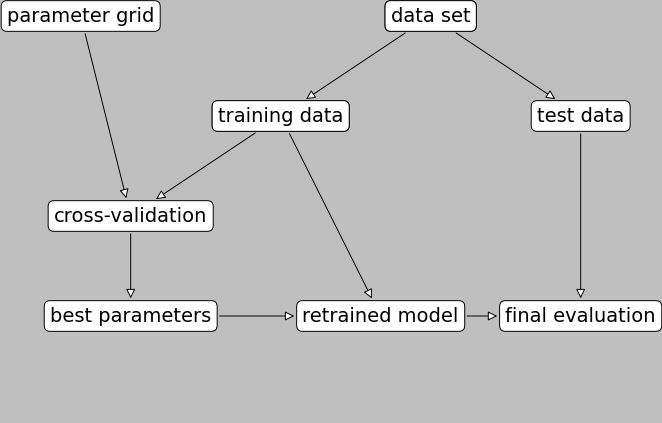

In [6]:
mglearn.plots.plot_grid_search_overview()

In [7]:
# sklearn 라이브러리를 활용한 그리드 서치
from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수를 dict 로 저장한다.
param_grid = {'C' : [0.001,0.01,0.1,1,10,100], 
              'gamma' : [0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# fit method 를 호출하면 그리드 서치를 진행하여 가장 적절한 매개변수를 찾는다.
grid_search.fit(X_train, y_train)

print(f"test score : {grid_search.score(X_test, y_test):0.3f}")

test score : 0.974


In [8]:
print("최적 매개변수 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : ", grid_search.best_score_)

최적 매개변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 :  0.9731225296442687


In [9]:
print("최고 성능 모델 :", grid_search.best_estimator_)

최고 성능 모델 : SVC(C=10, gamma=0.1)


## 교차 검증 결과 분석

In [10]:
result = pd.DataFrame(grid_search.cv_results_)
result.head().T

,0,1,2,3,4
mean_fit_time,0.001001,0.000801,0.000601,0.000867,0.000601
std_fit_time,0.0,0.0004,0.00049,0.000452,0.00049
mean_score_time,0.0004,0.0004,0.000403,0.0002,0.000403
std_score_time,0.00049,0.000491,0.000494,0.0004,0.000494
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


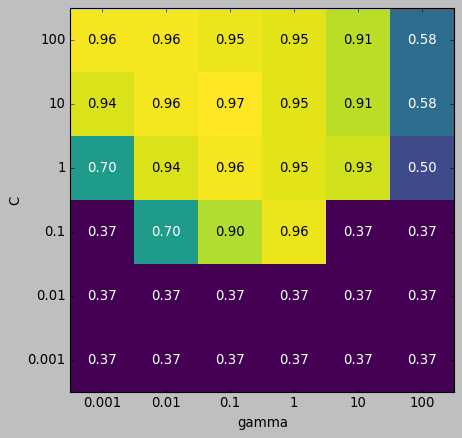

In [11]:
scores = np.array(result.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C',
                      yticklabels=param_grid['C'], cmap='viridis')

### 비대칭 매개변수 그리드 탐색

In [12]:
# dict 를 list 로 묶으면 각각의 원소를 독립적이라 보고 그리드 서치를 진행한다.
param_grid = [{'kernel': ['rbf'], 
               'C' : [0.001,0.01,0.1,1,10,100], 
              'gamma' : [0.001,0.01,0.1,1,10,100]},
              {'kernel': ['linear'], 'C' : [0.001,0.01,0.1,1,10,100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터 : ", grid_search.best_params_)
print(f"최고 교차 검증 점수 : {grid_search.best_score_:0.3f}")

최적 파라미터 :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.973


In [13]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000601,0.000601,0.0004,0.000801,0.0006,0.001001,0.0004,0.000806,0.0006,0.0004,...,0.000397,0.000601,0.000801,0.001001,0.000743,0.0006,0.0006,0.000401,0.0,0.000601
std_fit_time,0.00049,0.000491,0.00049,0.0004,0.00049,0.000001,0.00049,0.000403,0.00049,0.00049,...,0.000487,0.00049,0.0004,0.0,0.000388,0.00049,0.00049,0.000491,0.0,0.00049
mean_score_time,0.000801,0.0002,0.0002,0.0,0.0004,0.0,0.000801,0.0002,0.0002,0.0004,...,0.000348,0.0002,0.0002,0.0002,0.0,0.0006,0.000401,0.0006,0.000801,0.0004
std_score_time,0.0004,0.000401,0.0004,0.0,0.00049,0.0,0.0004,0.0004,0.0004,0.00049,...,0.000435,0.000401,0.0004,0.0004,0.0,0.00049,0.000491,0.00049,0.0004,0.00049
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522
